In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

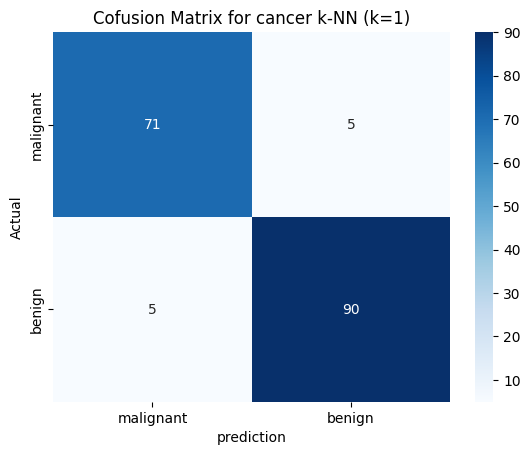

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
print(df.head())

x_cancer = df.drop('target', axis=1)
y_cancer = df['target']

x_train_c, x_test_c, y_train_c ,y_test_c = train_test_split(x,y,test_size=0.3, random_state=48)
print('Train set shape:', x_train_c.shape)
print('test set shape:', x_test_c.shape)

scaler = StandardScaler()
scaler.fit(x_train_c)

x_train_c_scaled = scaler.transform(x_train_c)
x_test_c_scaled = scaler.transform(x_test_c)

df_train_scaled = pd.DataFrame(x_train_scaled, columns = x.columns)
print(df_train_scaled.describe())

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_c_scaled, y_train_c)

print("โมเดล K-NN ถูกฝึกฝนเรียบร้อยแล้ว !")

predictions_c = knn.predict(x_test_c_scaled)
print("predictions_c:", predictions)

cm = confusion_matrix(y_test_c, predictions)
print("confusion_matrix:")
print(cm)
print(confusion_matrix(y_test_c, predictions_c))
print("\nClassification Report:")
print(classification_report(y_test_c, predictions_c))

plt.Figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names)
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('Cofusion Matrix for cancer k-NN (k=1)')
plt.show()